---
layout: post
title:  "Decision Tree"
date:   2021-11-06 8:14:54 +0700
categories: MachineLearning
---

# TOC
- [Definition](#define)
- [Algorithm: ID3 and CART](#algo)
- [Loss function: Entropy, Gini and MSE](#loss)
- [Code example](#code)

# Definition <a name="define"></a>
Decision tree is a white box model, in contrast to a black box model such as neural net. It is so because it is pretty straightforward and simple. In decision tree, there is a sequence of decisions to make, towards an end goal. For example, the end goal is that we want to know whether a person would be accepted into a school. We would study the problem and make questions: whether they have a technical educational background, do they like the school, what was their parents grade when they were at that school,etc. All the binary choice and multiple choice questions. And it also doesn't have to be just for classification question, it can predict value too, by averaging similar training instance. It is a tolerating model.

![DT1](https://user-images.githubusercontent.com/7457301/223480238-200f780b-9261-4919-ae6f-6eb9e4872d50.jpg)

As we can see, the diagram looks like a tree, with the first node to be the root node, since it is the most important question to take into account in the problem. It only seems logical that we need the consider the most burning question first. Here the root node ask whether his (or her) math capability is sufficient. It might be a talent school that is difficult at its entrance exam. Of course this is a simplication but let's go with it for the sake of a stylized situation. After we divide the possibility with the threshold of 8/10 for his math capability, if he is lucky and ends up with a grade of 9, we need to see whether he actually likes the school or not. That "like?" node would be one of the child note of the root one. If he doesn't, he might as well choose another one to the interest of his own. What if he doesn't like it? Should it be the end of the problem? This is where we should be mindful. Maybe he is a grown-up and the choice of his life is up to him already. But it can also be that this school is at the beginning of his life and the influence of his parents are still significant and meaningful. So we would ask another question, hopefully this settles the matter, whether his parents were enrolled in this school in their time. If he doesn't like it, but his parents have their legacies, then the consensus could be that he would apply for that school anyway. In this case, the last node (also called the leaf node) says that it is highly likely is that he got accepted. That would be it for our prediction.

Let's draw another diagram to demonstrate the intuition of the decision boundary in a visual way:

![decisiontree2-2](https://user-images.githubusercontent.com/7457301/223482008-5b3db05a-6039-4e53-8122-c54c4d44f3e9.jpg)

On x axis, we have the math grade. At the threshold of 8, the space is vertically divided into two sub space: grades bigger than 8 (say, 9 or 10), and grades smaller than 8 (from 0 to 7). On the y axis, there is the likeness that the student expresses toward the school. Let's encode anything larger than 0.5 to be yes, he likes and the rest to be no, he doesn't want. In the case he doesn't want the school despite the fact that he earns 9 over 10 in his current math class, we end up with the small subpace in the bottom right. Now the deciding question comes in and divides the subspace into two small subspace, this time for good, of whether his parents were in this prestigious school in their time or not. If they were, then the student migh unhappily joined since it is the choice in his best future interest, despite his state of emotions.

This easy example demonstrates the simple beauty of this model. However, we are still in machine learning, this model has an algorithm and a loss function with all its complexness to optimize over, too. In the following sections we would get to know the algorithms and then the loss functions.

# Algorithm <a name="algo"></a>

As we can see from doing the above exercise, a good algorithm for decision tree needs to know what questions to ask. To know how good a question is, we can judge it based on how it divides the possibility space. One way that comes to our mind is that at each node, we just choose what is the best (also called a greedy strategy). This rules out nodes that provide little today but provide a lot tomorrow. For example, at node "likeness", if the student choose to follow his thoughts, it might be that he ends up with a future of less. In any cases, when study this decision tree approach, people have come up with a measurement of how good a dividing question is, by investigating how good it separates the data into classes. For example, the question of "math > 8?" contributes by separate the dataset into "accepted" or "out" easily. If you get less than 8, the odds are clearly not in your favor. In technical terms, we say that this node is pure. On the other hand, the node of the question "like?" divides but not all the dataset. In other words, it is an impure question. It is impure in the sense that when we ask that question, we don't have a clear or definite answer of whether he got accepted (we can say for the record, a proportion of those students with this attribute is accepted though).

The problem becomes familiar: to minimize impurity (quantified by entropy or Gine, as we would soon discuss) for the classification task. To use decision tree for the regression task, we substitute impurity measure by the usual squared error (MSE) measure.

# Loss function: Entropy vs Gini vs MSE <a name="loss"></a>

## Entropy

There are several ways to define the term purity technically. One of those is using entropy. Entropy concept comes from physics, to measure how orderly a system is. If everything is in order (i.e. neat) the entropy is low. Entropy then is used in information theory, to calculate information and noise in the signals. 

Applying this concept into decision tree, we have that a node is pure if its entropy is low. A node with lowest entropy is like the "math grade > 8" node, in which the requirement of the school to be least 8 points. That node divides the dataset into "considering" and "out" in a clean fashion: if you get less than 8, simply go another way. A node has maximum entropy when the dataset is divided equally (all outcomes become equal if we consider according to that node).

Using entropy to measure purity, the loss function would be the total weighted entropy at all leaves (ending notes). Entropy is weighted with the number of data points in that node. To minimize this loss, at each node, we consider the way of division such that the entropy can decrease in the most possibile fashion. This is naturally a recursive algorithm: we start from the root, choose the best, then on to the next, choose the best, and so on.

The decision tree diverges from linear combination algorithms. We consider N input data, X attributes, and the probability for each data point is p. Entropy of the distribution of p is:

$$ H(p) = - \sum_{i=1}^{n} p_{i} log(p_{i}) $$

At each node, with N data points and K classes, the probability of class k is $$ \frac{N_{k}}{N} $$. Entropy is that node would be:

$$ H = - \sum_{k=1}^{K} \frac{N_{k}}{N} log \frac{N_{k}}{N} $$

with the convention that $ 0 log 0 = 0 $. Now we calculate the influence of each attribute x. Entropy of attribute x would be the number of data points n having that attribute x in child node c:

$$ H(x) = \sum_{k=1}{K} \frac{n}{N} H_{c} $$

The amount of information gained using attribute x is:

$$ G(x) = H - H(x) $$

In the algorithm called ID3, to find the questions to ask is to find the next-importance attribute x. To do this, we try to maximize the information gain which is also minimize the entropy of that attribute:

$$ x^{*} = argmax_{x} G(x) = arg min_{x} H(x) $$

Come back to the example at the beginning of this post, let's collect a dataset of students who also consider joining that school, with those attributes: math-grade, likeness, parents-were-in ,etc. 

Math-grade can be from 0 to 10. Likeness is binary, i.e. can be yes or no, if we need to encode it, 0 being negative. Parents-were-in is also binary. Same for target "accepted".

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|1|8|yes|yes|no|
|2|9|yes|yes|yes|
|3|10|no|yes|no|
|4|5|yes|yes|no|
|5|10|no|yes|yes|

With 5 data points, we have 2 "accepted" and 3 "out". The entropy of root node is:

$$ H = - \frac{2}{5} log \frac{2}{5} - \frac{3}{5} log \frac {3}{5} \approx 0.673  $$

Consider math-grade attribute: it has 2 values of bigger-than-8 and the rest. Each of those value has one child node. Child node bigger-than-8 has 3 data points, the other has 2.

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|2|9|yes|yes|yes|
|3|10|no|yes|no|
|5|10|no|yes|yes|

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|1|8|yes|yes|no|
|4|5|yes|yes|no|

Child node with grade <= 8 has outcomes of both "out". So entrpy of math-grade <= 8 would be 0 (which means that if you achieve math grade of less than or equal to 8, you are sorted).

Child node with grade > 8 have 3 data points. Of which one says no at the end and two say yes.

$$ H(mathGrade_{>8}) = - \frac{1}{3} log \frac{1}{3} - \frac{2}{3} log \frac {2}{3} \approx 0.634 $$

The entropy that this "math-grade" attribute contributes to the root node would be:

$$ H_{mathGrade} = \frac{3}{5} H(mathGrade_{>8}) + \frac{2}{5} * H(mathGrade_{<=8}) = \frac{3}{5} * 0.634 + \frac{2}{5} * 0 \approx 0.380 $$

Now we consider attributes likeness and parents-were-in. We then compare the entropies and choose the one that contribute least entropy to be the first node in the decision tree. The calculation for the rest is carried out recursively.

For likeness:

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|1|8|yes|yes|no|
|2|9|yes|yes|yes|
|4|5|yes|yes|no|

$$ H(likeness_{yes}) = - \frac{1}{3} log \frac{1}{3} - \frac{2}{3} log \frac{2}{3} \approx 0.636 $$

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|3|10|no|yes|no|
|5|10|no|yes|yes|

$$ H(likeness_{no}) = - \frac{1}{2} log \frac{1}{2} - \frac{1}{2} log \frac{1}{2} \approx 0.693 $$

The total entroy of this attribute "likeness" is:

$$ H(likeness) = \frac{3}{5} * 0.636 + \frac{2}{5} * 0.693 \approx 0.659 > 0.380 = H(mathGrade) $$

Please calculate the contributing entropy of attribute parents-were-in and check whether attribute math-grade is the most important one.

|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|1|8|yes|yes|no|
|2|9|yes|yes|yes|
|3|10|no|yes|no|
|4|5|yes|yes|no|
|5|10|no|yes|yes|

$$ H(parentsWereIn_{yes}) = - \frac{2}{5} log \frac{2}{5} - \frac{3}{5} log \frac{3}{5} \approx 0.673 $$

$$ H(parentsWereIn_{no}) = 0 log 0 = 0 $$ by convention.

$$ H(parentsWereIn) = 1 * 0.673 = 0.673 $$

We can see that, at the root node, the most importance decision comes from the math ability of the student, then his preference over different school. His parents' advice comes the least.

Coming back to the general algorithm, to make the tree simple and not overfit, we can limit the depth, leaves or prune nodes. Some interesting heuristics: rule out nodes with small entropy contribution, small data points, run the full algorithm then prune out nodes that is statistically insignificant, add a regularized term into the entropy formula to raise loss according to leaf numbers etc.

The difference between ID3 and CART is that CART is generalized to use for both classification and regression. 

## Gini

Gini is a familiar indicator in econometrics, for example, used to measure the inequality between rich and poor countries. Here is Gini adapted for decision tree:

$$ Gini = 1 - \sum_{i=1}^{K} p_{i}^2 = 1 - \sum_{i=1}^{K} (\frac{N_k}{N})^2 $$

It is 1 minus the square of probabilities. This Gini is used in the CART algorithm by sklearn instead of entropy method. The cost function is similar to the entropy:

$$ Loss = \sum_{node} (\text{proportion of that node} * \text{its Gini}) $$

with proportion of that node to be the number of data points in that node.

## MSE

The MSE (mean squared error) is used when we use the decision tree for regression task. For example, given N input for N output and each input has X attributes, we form the decision tree for each threshold to be a question (a node). Then, we can make use of the decision tree: for a new input i, we follow along the tree and ends up with its prediction, its MSE and the number of data points that were used to average that output. The algorithm divides the original set of data points so that each region contains the as close together as possible points.

In the cost function for the regression problem, we substitute Gini by MSE (instead of minimizing impurity it minimizes the squared error):

$$ Loss = \sum_{node} (\text{proportion of that node} * \text{its MSE}) $$

where $$ MSE_{node} = \sum_{i\in node}(\hat{y}_{node} - y^{(i)})^{2} $$

We are utilizing the idea of linear regression: to measure the distance between the predicted value in the node and the true output. The predicted $$ \hat{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node} y^{(i)}$$ is the average of those observed outcomes.

# Code example <a name="code"></a>





In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


|id|math-grade|likeness|parents|accepted|
|--|--|--|--|--|
|1|8|yes|yes|no|
|2|9|yes|yes|yes|
|3|10|no|yes|no|
|4|5|yes|yes|no|
|5|10|no|yes|yes|

In [18]:
X = [[8,1,1],[9,1,1],[10,0,1],[5,1,1],[10,0,1]]
y=['no','yes','no','no','yes']
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

In [21]:
export_graphviz(
        tree_clf,
        out_file="student.dot",
        feature_names=['math','likeness','parents'],
        class_names=['no','yes'],
        rounded=True,
        filled=True
    )

`dot -Tpng student.dot -o student.png`

![student](https://user-images.githubusercontent.com/7457301/223480273-a6f6b69c-3478-4ded-9003-7fa5016e66f3.png)

Accuracy: 50.00%


Text(0.5, 1.0, 'Confusion Matrix')

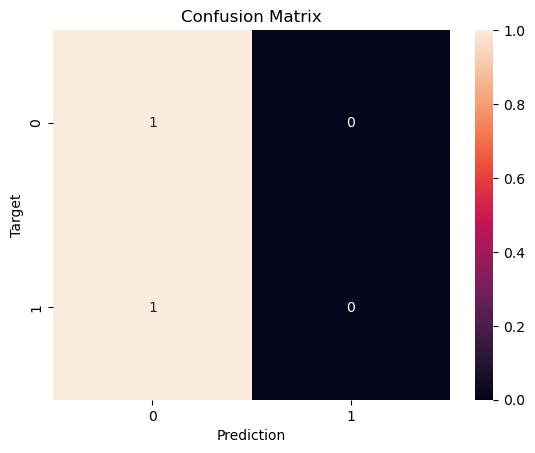

In [30]:
X_test=[[5,0,0],[9,0,0]]
y_test=['no', 'yes']
y_pred=tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

![DT3](https://user-images.githubusercontent.com/7457301/223480264-ff99d777-7ab8-4bce-a601-d1de9ea45942.png)

Now let's consider the regression part. We use the decision tree regressor to predict the term grade of students, taking into account grade in maths, literature, IT and physcial education.

|id|maths|literature|IT| physical education| 	final|
|--|--|--|--|--|--|
|1|	8 | 7|8|9 |9.5|	        
|2|	9 |	6|3|10|5.5|      
|3|	10|	6|6|8 |7.5|      
|4|	5 | 5|7|9 |6.0|     
|5|	10|	8|8|7 |9.0|     
|...|

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X2 = [[8,7,8,9],[9,6,3,10],[10,6,6,8],[5,5,7,9],[10,8,8,7],
     [9,7,8,9],[9,7,3,10],[10,6,5,8],[5,4,7,9],[9,8,8,7],
     [8,6,8,9],[9,6,7,10],[10,6,9,8],[5,5,8,9],[5,8,8,7],
     [8,7,3,9],[9,6,3,8],[10,6,10,8],[5,6,7,9],[10,7,8,7]]
y2=[9.5,5.5,7.5,6.0,9.0,
    7.5,4.5,9,6.5,9.5,
    8.5,7,7,7,8.5,
    9,5.0,5,8,7.0,]
tree_clf2 = DecisionTreeRegressor(criterion = 'mse',max_depth=5)
tree_clf2.fit(X2, y2)
export_graphviz(
        tree_clf2,
        out_file="student2.dot",
    )
X2_test=[[5,6,7,4],[9,5,7,10]]
y2_test=[8.0, 7.5]
y2_pred=tree_clf2.predict(X2_test)
mean_squared_error(y2_test, y2_pred)

/Users/nguyenlinhchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.04499999999999995

Here is the decision tree regressor:

![student2](https://user-images.githubusercontent.com/7457301/223480279-bcf0a88f-ab94-46d6-87d6-3c137122a298.png)

We can see that, first the model consider X1 which is literature, then it considers X0 which is maths, then IT, and then physical education. The MSE is 0.05 which is quite low.

In [47]:
tree_clf3 = DecisionTreeRegressor(criterion = 'mse',max_depth=4)
tree_clf3.fit(X2, y2)
export_graphviz(
        tree_clf3,
        out_file="student3.dot",
    )
X2_test=[[5,6,7,4],[9,5,7,10]]
y2_test=[8.0, 7.5]
y2_pred=tree_clf3.predict(X2_test)
mean_squared_error(y2_test, y2_pred)

/Users/nguyenlinhchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.03125

At the depth of 4 (which is less than above) the model doesn't consider X3 (physical education) and achieve lower MSE (at 0.03):

![student3](https://user-images.githubusercontent.com/7457301/223480292-d9179bf4-14b6-41ff-9311-8798cc8cdced.png)